In [1]:
#Import scikit-learn dataset library
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [2]:
#Load dataset
DataFrame= {
    'kamera': { 'training':  '', 'testing': '' }
}


DataFrame['kamera']['training'] = pd.read_csv("Dataframe kesegaran [Kamera][Training].csv")
DataFrame['kamera']['testing'] = pd.read_csv("Dataframe kesegaran [Kamera][Testing].csv")

In [3]:
DataFrame['kamera']['training']

,filename,contrast_00,contrast_45,contrast_90,contrast_135,corellation_00,corellation_45,corellation_90,corellation_135,homogeneity_00,...,variance_90,variance_135,r,g,b,h,s,i,grayscale,class
0,IMG_3342.JPG,33.322281,75.659061,47.212660,65.617893,0.000763,0.000753,0.000757,0.000756,0.312801,...,1297.085590,1289.660553,0.540711,0.540845,0.596598,0.557870,0.030893,0.487570,0.557514,0
1,IMG_3346.JPG,138.419476,246.026226,157.925135,228.586149,0.001438,0.001296,0.001410,0.001319,0.170747,...,618.564540,617.892889,0.553729,0.561722,0.652987,0.588211,0.035111,0.317462,0.588140,0
2,IMG_3348.JPG,167.498647,264.764028,171.277559,260.403869,0.001131,0.001059,0.001133,0.001063,0.160965,...,786.872701,784.946182,0.594296,0.611894,0.670473,0.623880,0.024370,0.158512,0.627432,0
3,IMG_3351.JPG,88.244587,153.657263,107.873339,158.712753,0.001072,0.001034,0.001062,0.001031,0.209957,...,884.305523,882.882395,0.567326,0.563095,0.661655,0.595969,0.032715,0.636331,0.593136,0
4,IMG_3355.JPG,72.725578,150.810652,103.615896,138.556451,0.000959,0.000924,0.000945,0.000931,0.204643,...,1003.715253,1000.235489,0.540630,0.538334,0.664814,0.579472,0.043566,0.572263,0.576500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,IMG_4341.JPG,15.602608,37.458739,29.329232,40.277699,0.005769,0.005413,0.005540,0.005356,0.500075,...,164.406279,163.736082,0.809466,0.804446,0.829050,0.812545,0.012008,0.708433,0.812373,2
270,IMG_4345.JPG,19.326895,49.152334,32.237328,39.249736,0.004000,0.003753,0.003885,0.003839,0.382888,...,240.088771,239.101441,0.732474,0.716605,0.794750,0.746074,0.021575,0.832629,0.741899,2
271,IMG_4347.JPG,16.451341,42.370513,32.030758,41.008742,0.003255,0.003206,0.003265,0.003212,0.514703,...,289.300660,289.296582,0.766343,0.763874,0.811014,0.778528,0.017802,0.651872,0.778334,2
272,IMG_4348.JPG,3.288324,11.400087,10.432210,13.541881,0.005835,0.005784,0.005802,0.005742,0.679077,...,166.972306,167.101279,0.830658,0.828715,0.844818,0.832907,0.009286,0.636906,0.833729,2


In [4]:
DataFrame['kamera']['testing']

,filename,contrast_00,contrast_45,contrast_90,contrast_135,corellation_00,corellation_45,corellation_90,corellation_135,homogeneity_00,...,variance_90,variance_135,r,g,b,h,s,i,grayscale,class
0,IMG_3339.JPG,178.681841,310.518197,223.149729,294.780210,0.001052,0.000963,0.001024,0.000974,0.182336,...,847.799102,848.751070,0.573860,0.586884,0.661410,0.606152,0.032419,0.221706,0.607726,0
1,IMG_3341.JPG,80.489296,141.661727,105.218073,169.550437,0.001014,0.000984,0.001003,0.000969,0.244874,...,941.120426,939.067169,0.597394,0.603084,0.690289,0.629206,0.035057,0.365555,0.628577,0
2,IMG_3349.JPG,94.117680,168.386075,115.930303,174.919462,0.000755,0.000737,0.000754,0.000735,0.165005,...,1265.527831,1266.398477,0.583650,0.612377,0.689173,0.627201,0.031410,0.092207,0.631951,0
3,IMG_3353.JPG,103.501169,172.251845,121.605500,180.218736,0.000657,0.000646,0.000658,0.000644,0.243647,...,1456.469433,1457.191309,0.646874,0.652511,0.714968,0.669959,0.027979,0.308107,0.670633,0
4,IMG_3363.JPG,96.157480,174.329345,111.066314,169.080662,0.000706,0.000685,0.000700,0.000686,0.167748,...,1371.414954,1366.563734,0.579911,0.589322,0.646212,0.604229,0.027326,0.356657,0.605322,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,IMG_3732.JPG,63.327448,129.661045,91.508612,122.476099,0.001499,0.001420,0.001466,0.001429,0.226291,...,632.669989,632.004636,0.492440,0.468362,0.615878,0.524224,0.046835,0.876800,0.515225,2
112,IMG_3740.JPG,148.494094,242.967884,172.848179,244.392337,0.000648,0.000626,0.000640,0.000626,0.140743,...,1469.760636,1465.408042,0.470720,0.475852,0.596121,0.512664,0.046496,0.318969,0.511269,2
113,IMG_4327.JPG,12.632751,36.930622,29.392840,36.774382,0.002012,0.002000,0.002010,0.001999,0.626434,...,482.279431,481.031817,0.788357,0.795410,0.807929,0.796148,0.011170,0.585163,0.798262,2
114,IMG_4337.JPG,7.890687,27.391283,22.697527,28.796206,0.002630,0.002698,0.002708,0.002692,0.565008,...,357.521672,356.500007,0.700807,0.734311,0.749049,0.726480,0.016027,0.269173,0.734894,2


# RGB

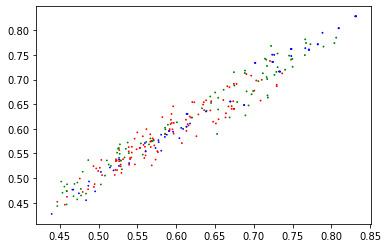

In [5]:
data_feature_training = DataFrame['kamera']['training'][['r', 'g', 'b']]
data_class_training = DataFrame['kamera']['training']["class"]
data_feature_testing = DataFrame['kamera']['testing'][['r', 'g', 'b']]
data_class_testing = DataFrame['kamera']['testing']["class"]


colors = {0: 'r' , 1 : 'g' , 2: 'b' ,}
plt.scatter(data_feature_training['r'], 
            data_feature_training['g'], 
            data_feature_training['b'], 
            c=[colors[k] for k in data_class_training])

In [6]:
clf = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))
print(confusion_matrix(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.76      0.62        49
           1       0.41      0.33      0.36        40
           2       0.69      0.33      0.45        27

    accuracy                           0.51       116
   macro avg       0.54      0.47      0.48       116
weighted avg       0.52      0.51      0.49       116

[[37 12  0]
 [23 13  4]
 [11  7  9]]


[0.5871213096634127, 0.6011451829519523, 0.6390616230580998]
[0.5878563272864372, 0.6057631074132913, 0.6372364407862418]
[0.6749577974289795, 0.6858674932122635, 0.7081526399706568]


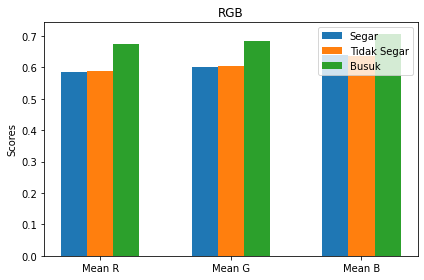

In [8]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Mean R', 'Mean G', 'Mean B']

dataframe = DataFrame['kamera']['training'][['r', 'g', 'b', 'class']]
data_segar = dataframe.query("`class` == 0")
data_tidak_segar = dataframe.query("`class` == 1")
data_busuk = dataframe.query("`class` == 2")


r_means = [np.mean(data_segar['r']), np.mean(data_tidak_segar['r']), np.mean(data_busuk['r'])]
print(r_means)
g_means = [np.mean(data_segar['g']), np.mean(data_tidak_segar['g']), np.mean(data_busuk['g'])]
print(g_means)
b_means = [np.mean(data_segar['b']), np.mean(data_tidak_segar['b']), np.mean(data_busuk['b'])]
print(b_means)

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, r_means, width, label='Segar')
rects2 = ax.bar(x, g_means, width, label='Tidak Segar')
rects3 = ax.bar(x + width, b_means, width, label='Busuk')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('RGB')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# HSI

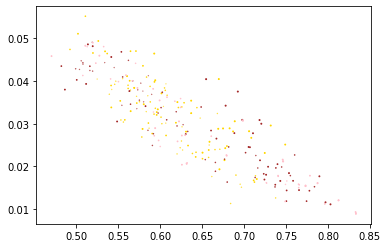

In [7]:
data_feature_training = DataFrame['kamera']['training'][['h', 's', 'i']]
data_class_training = DataFrame['kamera']['training']["class"]
data_feature_testing = DataFrame['kamera']['testing'][['h', 's', 'i']]
data_class_testing = DataFrame['kamera']['testing']["class"]


colors = {0: 'gold' , 1 : 'brown' , 2: 'pink' ,}
plt.scatter(data_feature_training['h'], 
            data_feature_training['s'], 
            data_feature_training['i'], 
            c=[colors[k] for k in data_class_training])

In [8]:
#Create a KNN Classifier
clf = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))
print(confusion_matrix(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.63      0.60        49
           1       0.47      0.53      0.49        40
           2       0.41      0.26      0.32        27

    accuracy                           0.51       116
   macro avg       0.48      0.47      0.47       116
weighted avg       0.50      0.51      0.50       116

[[31 13  5]
 [14 21  5]
 [ 9 11  7]]


[0.6150519937820901, 0.6294156480109554, 0.6599693293181362]
[0.03182508611775794, 0.030707647544133444, 0.027343776824105135]
[0.47567483877474753, 0.43379659388337755, 0.567154236046183]


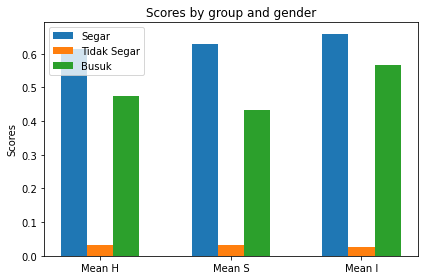

In [12]:
labels = ['Mean H', 'Mean S', 'Mean I']

dataframe = DataFrame['kamera']['training'][['h', 's', 'i', 'class']]
data_segar = dataframe.query("`class` == 0")
data_tidak_segar = dataframe.query("`class` == 1")
data_busuk = dataframe.query("`class` == 2")


h_means = [np.mean(data_segar['h']), np.mean(data_tidak_segar['h']), np.mean(data_busuk['h'])]
print(h_means)
s_means = [np.mean(data_segar['s']), np.mean(data_tidak_segar['s']), np.mean(data_busuk['s'])]
print(s_means)
i_means = [np.mean(data_segar['i']), np.mean(data_tidak_segar['i']), np.mean(data_busuk['i'])]
print(i_means)

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, h_means, width, label='Segar')
rects2 = ax.bar(x, s_means, width, label='Tidak Segar')
rects3 = ax.bar(x + width, i_means, width, label='Busuk')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# GRAYSCALE

In [9]:
data_feature_training = DataFrame['kamera']['training'][['grayscale',]]
data_class_training = DataFrame['kamera']['training']["class"]
data_feature_testing = DataFrame['kamera']['testing'][['grayscale',]]
data_class_testing = DataFrame['kamera']['testing']["class"]


# colors = {0: 'black' , 1 : 'red' , 2: 'blue' ,}
# plt.scatter(data_feature_training['grayscale'],y=""
#             c=[colors[k] for k in data_class_training])

In [10]:
#Create a KNN Classifier
clf = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))
print(confusion_matrix(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.78      0.62        49
           1       0.38      0.30      0.33        40
           2       0.10      0.04      0.05        27

    accuracy                           0.44       116
   macro avg       0.33      0.37      0.34       116
weighted avg       0.37      0.44      0.39       116

[[38  6  5]
 [24 12  4]
 [12 14  1]]


0.6270691968193528
0.6153957041801096
0.6498616194524685


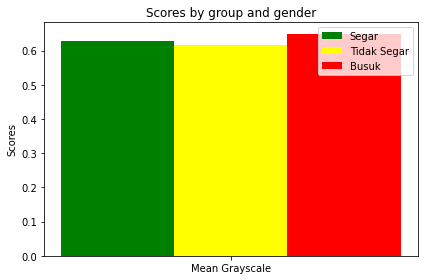

In [16]:
labels = ['Mean Grayscale']

dataframe = DataFrame['kamera']['testing'][['grayscale', 'class']]
data_segar = dataframe.query("`class` == 0")
data_tidak_segar = dataframe.query("`class` == 1")
data_busuk = dataframe.query("`class` == 2")


h_means = np.mean(data_segar['grayscale'])
print(h_means)
s_means = np.mean(data_tidak_segar['grayscale'])
print(s_means)
i_means = np.mean(data_busuk['grayscale'])
print(i_means)


x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, h_means, width, label='Segar', color='green')
rects2 = ax.bar(x, s_means, width, label='Tidak Segar' , color='yellow')
rects3 = ax.bar(x + width, i_means, width, label='Busuk',  color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# GLCM

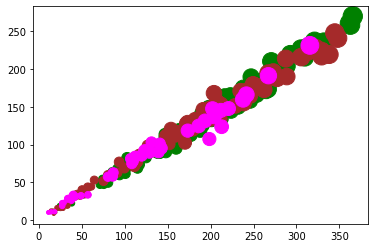

In [11]:
data_feature_training = DataFrame['kamera']['training'][['contrast_00',
                                                    'contrast_45',
                                                    'contrast_90',
                                                    'contrast_135',
                                                    'corellation_00',
                                                    'corellation_45',
                                                    'corellation_90',
                                                    'corellation_135',
                                                    'homogeneity_00',
                                                    'homogeneity_45',
                                                    'homogeneity_90',
                                                    'homogeneity_135',
                                                    'entropy_00',
                                                    'entropy_45',
                                                    'entropy_90',
                                                    'entropy_135',
                                                    'variance_00',
                                                    'variance_45',
                                                    'variance_90',
                                                    'variance_135',
                                                    ]]
data_class_training = DataFrame['kamera']['training']["class"]
data_feature_testing = DataFrame['kamera']['testing'][['contrast_00',
                                                    'contrast_45',
                                                    'contrast_90',
                                                    'contrast_135',
                                                    'corellation_00',
                                                    'corellation_45',
                                                    'corellation_90',
                                                    'corellation_135',
                                                    'homogeneity_00',
                                                    'homogeneity_45',
                                                    'homogeneity_90',
                                                    'homogeneity_135',
                                                    'entropy_00',
                                                    'entropy_45',
                                                    'entropy_90',
                                                    'entropy_135',
                                                    'variance_00',
                                                    'variance_45',
                                                    'variance_90',
                                                    'variance_135',
                                                  ]]
data_class_testing = DataFrame['kamera']['testing']["class"]


colors = {0: 'green' , 1 : 'brown' , 2: 'magenta' ,}
plt.scatter(
#             data_feature_training['contrast_00'],
            data_feature_training['contrast_45'],
            data_feature_training['contrast_90'],
            data_feature_training['contrast_135'],
#             data_feature_training['corellation_00'],
#             data_feature_training['corellation_45'],
#             data_feature_training['corellation_90'],
#             data_feature_training['corellation_135'],
#             data_feature_training['homogeneity_00'],
#             data_feature_training['homogeneity_45'],
#             data_feature_training['homogeneity_90'],
#             data_feature_training['homogeneity_135'],
#             data_feature_training['entropy_00'],
#             data_feature_training['entropy_45'],
#             data_feature_training['entropy_90'],
#             data_feature_training['entropy_135'],
#             data_feature_training['variance_00'],
#             data_feature_training['variance_45'],
#             data_feature_training['variance_90'],
#             data_feature_training['variance_135'],
            c=[colors[k] for k in data_class_training])

In [12]:
#Create a KNN Classifier
clf = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))
print(confusion_matrix(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.63      0.60        49
           1       0.40      0.35      0.37        40
           2       0.41      0.41      0.41        27

    accuracy                           0.48       116
   macro avg       0.46      0.46      0.46       116
weighted avg       0.48      0.48      0.48       116

[[31 15  3]
 [13 14 13]
 [10  6 11]]


# GLCM+RGB

In [13]:
data_feature_training = DataFrame['kamera']['training'][['contrast_00',
                                                    'contrast_45',
                                                    'contrast_90',
                                                    'contrast_135',
                                                    'corellation_00',
                                                    'corellation_45',
                                                    'corellation_90',
                                                    'corellation_135',
                                                    'homogeneity_00',
                                                    'homogeneity_45',
                                                    'homogeneity_90',
                                                    'homogeneity_135',
                                                    'entropy_00',
                                                    'entropy_45',
                                                    'entropy_90',
                                                    'entropy_135',
                                                    'variance_00',
                                                    'variance_45',
                                                    'variance_90',
                                                    'variance_135',
                                                    'r',
                                                    'g',
                                                    'b',
                                                    ]]
data_class_training = DataFrame['kamera']['training']["class"]
data_feature_testing = DataFrame['kamera']['testing'][['contrast_00',
                                                    'contrast_45',
                                                    'contrast_90',
                                                    'contrast_135',
                                                    'corellation_00',
                                                    'corellation_45',
                                                    'corellation_90',
                                                    'corellation_135',
                                                    'homogeneity_00',
                                                    'homogeneity_45',
                                                    'homogeneity_90',
                                                    'homogeneity_135',
                                                    'entropy_00',
                                                    'entropy_45',
                                                    'entropy_90',
                                                    'entropy_135',
                                                    'variance_00',
                                                    'variance_45',
                                                    'variance_90',
                                                    'variance_135',
                                                    'r',
                                                    'g',
                                                    'b',
                                                  ]]
data_class_testing = DataFrame['kamera']['testing']["class"]

In [14]:
#Create a KNN Classifier
clf = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.63      0.60        49
           1       0.40      0.35      0.37        40
           2       0.41      0.41      0.41        27

    accuracy                           0.48       116
   macro avg       0.46      0.46      0.46       116
weighted avg       0.48      0.48      0.48       116



# GLCM+HSI

In [15]:
data_feature_training = DataFrame['kamera']['training'][['contrast_00',
                                                    'contrast_45',
                                                    'contrast_90',
                                                    'contrast_135',
                                                    'corellation_00',
                                                    'corellation_45',
                                                    'corellation_90',
                                                    'corellation_135',
                                                    'homogeneity_00',
                                                    'homogeneity_45',
                                                    'homogeneity_90',
                                                    'homogeneity_135',
                                                    'entropy_00',
                                                    'entropy_45',
                                                    'entropy_90',
                                                    'entropy_135',
                                                    'variance_00',
                                                    'variance_45',
                                                    'variance_90',
                                                    'variance_135',
                                                    'h',
                                                    's',
                                                    'i',
                                                    ]]
data_class_training = DataFrame['kamera']['training']["class"]
data_feature_testing = DataFrame['kamera']['testing'][['contrast_00',
                                                    'contrast_45',
                                                    'contrast_90',
                                                    'contrast_135',
                                                    'corellation_00',
                                                    'corellation_45',
                                                    'corellation_90',
                                                    'corellation_135',
                                                    'homogeneity_00',
                                                    'homogeneity_45',
                                                    'homogeneity_90',
                                                    'homogeneity_135',
                                                    'entropy_00',
                                                    'entropy_45',
                                                    'entropy_90',
                                                    'entropy_135',
                                                    'variance_00',
                                                    'variance_45',
                                                    'variance_90',
                                                    'variance_135',
                                                    'h',
                                                    's',
                                                    'i',
                                                  ]]
data_class_testing = DataFrame['kamera']['testing']["class"]


In [16]:
#Create a KNN Classifier
clf = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.63      0.60        49
           1       0.40      0.35      0.37        40
           2       0.41      0.41      0.41        27

    accuracy                           0.48       116
   macro avg       0.46      0.46      0.46       116
weighted avg       0.48      0.48      0.48       116

